# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

We are using seaborn here to get some beautiful plots. using this module is'nt mandatory.

In [2]:
#importing the data
parking_meter = pd.read_csv('parking_meter.csv')

While Importing data, make sure your script path and data path is same.

## Ans no. 1

In [3]:
print("Median Meter Rate: ", np.median(parking_meter.meter_rate))
print("Greater than five dollars: ", np.count_nonzero(parking_meter.meter_rate > 5))

Median Meter Rate:  2.0
Greater than five dollars:  1093


## Ans no. 2

In [4]:
print("Pay phone Missing Values: ", parking_meter.pay_phone.isnull().sum())

Pay phone Missing Values:  57


We are checking if there's any null value by `is_nul()`. if found it would return a 1, zero otherwise. by the `sum()` method, we're just counting the 1's.

## Ans no. 3

In [5]:
print("most frequent meter rate: ", parking_meter.meter_rate.mode())
# to get all the frequencies, run the following,
print("No. of Unique Values: ", len(parking_meter.meter_rate.unique()))

most frequent meter rate:  0    1.0
Name: meter_rate, dtype: float64
No. of Unique Values:  13


## Ans no. 4

In [6]:
parking_meter.groupby("credit_card").meter_rate.mean()

credit_card
No     2.463261
Yes    3.965208
Name: meter_rate, dtype: float64

## Ans no. 5

In [7]:
parking_meter.geo_local_area.unique().tolist()

['West End',
 'Strathcona',
 'Riley Park',
 'West Point Grey',
 'Fairview',
 'Downtown',
 'South Cambie',
 'Kitsilano',
 'Mount Pleasant',
 'Grandview-Woodland',
 'Kerrisdale',
 'Arbutus-Ridge',
 'Renfrew-Collingwood',
 'Killarney',
 'Kensington-Cedar Cottage',
 'Sunset',
 'Hastings-Sunrise',
 'Shaughnessy']

## Ans no. 6

Here we calculate groupwise `mean` `median` and `std` by using the method `agg()` this method can take a function or a list of function. store the result in a variable named `area_meter`. you can take a look by running `area_meter.head()` if You want!

Then we set the area names as index, and mean, median, std's as column. after that we apply tupple function over the columns by `apply(tuple, axis=1)` then convarted to a list.

In [8]:
area_meter = parking_meter.groupby("geo_local_area", as_index = False).meter_rate.agg(["mean","median", "std"]).reset_index()
area_meter.set_index("geo_local_area")[["mean", "median", "std"]].apply(tuple, axis=1).to_dict()

{'Arbutus-Ridge': (2.2533783783783785, 2.0, 1.298215181923607),
 'Downtown': (3.3140595653340488, 3.0, 2.196172393668069),
 'Fairview': (3.222735674676525, 3.0, 1.9505652305477315),
 'Grandview-Woodland': (2.076923076923077, 2.0, 1.1106816164985363),
 'Hastings-Sunrise': (1.0, 1.0, 0.0),
 'Kensington-Cedar Cottage': (1.78, 2.0, 0.41845195759648024),
 'Kerrisdale': (2.464028776978417, 2.0, 1.243301308651053),
 'Killarney': (1.3125, 1.0, 0.748654707437108),
 'Kitsilano': (2.3347826086956522, 2.0, 1.5399599208080177),
 'Mount Pleasant': (1.851685393258427, 1.0, 1.4682322083620387),
 'Renfrew-Collingwood': (0.9883720930232558, 1.0, 0.07624928516630232),
 'Riley Park': (1.575, 1.0, 0.9417154331268269),
 'Shaughnessy': (2.0, 2.0, 0.0),
 'South Cambie': (1.0, 1.0, 0.0),
 'Strathcona': (1.904527559055118, 1.0, 1.256634924926377),
 'Sunset': (0.9931506849315068, 1.0, 0.05852057359806527),
 'West End': (2.751595744680851, 2.0, 1.7560931824887807),
 'West Point Grey': (0.9971751412429378, 1.0, 0.

\
__Mean Median and std for `Mount Pleasant` is following:__

In [9]:
area_meter.loc[area_meter['geo_local_area']=="Mount Pleasant"]

,geo_local_area,mean,median,std
9,Mount Pleasant,1.851685,1.0,1.468232


## Ans no. 7

we are using an empty array named _`mean_holder`_ to collect all the average values.

In [10]:
mean_holder = np.array([])

Using a for loop to go through element by element and look for if there's any longitude or latitude within 0.001 \
here we used following conditions to meet our criteria, \
`longitude <= longitude[i]+0.001` and `longitude >= longitude[i]-0.001`, \
`latitude <= latitude[i]+0.001` and `latitude >= latitude[i]-0.001` \
collecting the longitudes and latitudes in variabe named `found_neighbor` and then calculating the mean and store it to `mean_holder`, if we don't found any neighbors then store `0` to mean holder variable.

In [11]:
for i in range(len(parking_meter)):
    neighbor = parking_meter.loc[(((parking_meter.longitude <= parking_meter.longitude[i]+0.001) & (parking_meter.longitude >= parking_meter.longitude[i]-0.001)) & ((parking_meter.latitude <= parking_meter.latitude[i]+0.001) & (parking_meter.latitude >= parking_meter.latitude[i]-0.001))) ,'meter_rate']
    
    found_neighbor = np.size(neighbor)
    
    if found_neighbor:
        mean_holder = np.append(mean_holder, np.mean(neighbor))
    else:
        mean_holder = np.append(mean_holder, 0)

Finally, converting `mean_holder` to a list, and assign as a new column into `parking_meter` DataFrame.

In [12]:
parking_meter['neighborhood_avg'] = mean_holder.tolist()

## Ans no. 8

The last column `mean_rate` is area-wise mean.

In [13]:
parking_meter['mean_rate'] = parking_meter.groupby('geo_local_area')['meter_rate'].transform('mean')
parking_meter.head()

,meter_head,meter_rate,time_in_effect,time_limit,credit_card,pay_phone,longitude,latitude,geo_local_area,meter_id,neighborhood_avg,mean_rate
0,Twin,2.0,METER IN EFFECT: 9:00 AM TO 10:00 PM,2,No,66890,-123.128871,49.286901,West End,670805,1.388889,2.751596
1,Pay Station,1.0,METER IN EFFECT: 9:00 AM TO 10:00 PM,10,Yes,59916,-123.098183,49.272146,Strathcona,471405,1.000000,1.904528
2,Twin,1.0,METER IN EFFECT: 9:00 AM TO 10:00 PM,2,No,57042,-123.101308,49.254679,Riley Park,C80145,0.986111,1.575000
3,Single,1.0,METER IN EFFECT: 9:00 AM TO 10:00 PM,2,No,57159,-123.186228,49.263409,West Point Grey,D03704,0.979167,0.997175
4,Twin,2.0,METER IN EFFECT: 9:00 AM TO 10:00 PM,2,No,51104,-123.127840,49.263541,Fairview,301023,2.750000,3.222736


## Ans no. 9

In [14]:
parking_meter.loc[parking_meter.longitude == parking_meter['longitude'].max(), 'meter_id']

8499    993385
Name: meter_id, dtype: object

In [15]:
diff = np.array(parking_meter.meter_rate - parking_meter.neighborhood_avg)
parking_meter.meter_id[np.argmax(diff)]

'B80109'

## Ans no. 10

Corelation between `latitude` and `meter_rate`

In [16]:
parking_meter['latitude'].corr(parking_meter['meter_rate'])

0.23136567954917248

Corelation between `longitude` and `meter_rate`

In [17]:
parking_meter['longitude'].corr(parking_meter['meter_rate'])

0.026965950561340934

## Ans no. 11

First we're using `matplotlib` module.

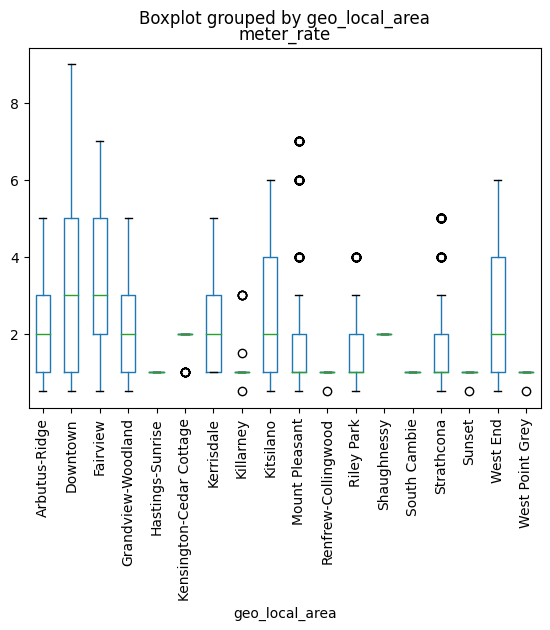

In [18]:
# matplotlib
parking_meter.boxplot(by='geo_local_area', column=['meter_rate'], grid=False)
plt.xticks(rotation=90)
plt.show()

Then we'll use `seaborn` module, to get a better plot. This is'nt mandatory. you can skip this!

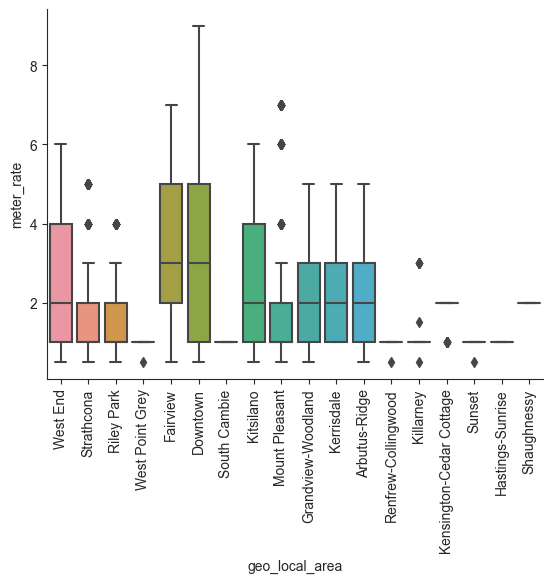

In [19]:
#using seaborn
sns.set_style('ticks')
sns.boxplot(x='geo_local_area', y='meter_rate', data=parking_meter)
sns.despine()
plt.xticks(rotation=90)
plt.show()

## Ans no. 12

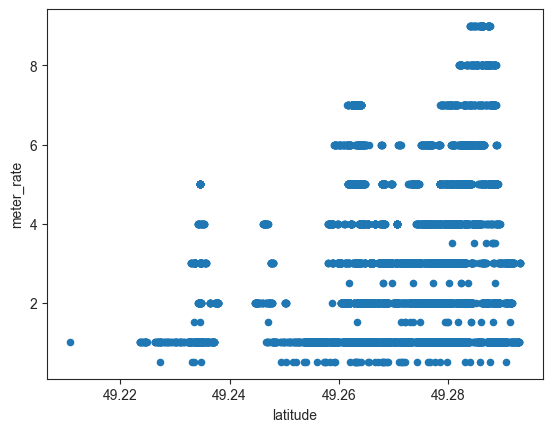

In [20]:
# using matplotlib
parking_meter.plot(kind = "scatter", x = "latitude", y = "meter_rate")
plt.show()

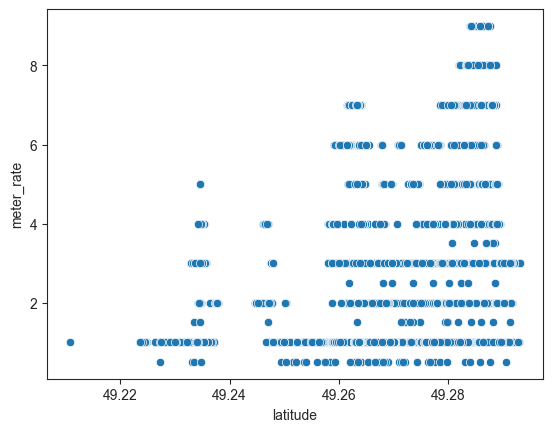

In [21]:
# using seaborn
sns.set_style('ticks')
sns.scatterplot(data = parking_meter, x = "latitude", y = "meter_rate")
plt.show()

# Please Don't Just Submit this script directly to Professor. Modify it to meet your satisfaction. atleast, add some texts!

In [22]:
# When I wrote this code, only God and I understood what I did. Now only God knows.
# ______________ THANK YOU ____________________